# Kmeans clustering
Nel seguente notebook effettuiamo il clustering dei dati ottenuti. Si effettua prima uno scaling dei dati, poi un analisi del numero ottimale dei cluster e infine si effettua il clustering effettivo. Con il kmeans classico non si includono gli atributi categorici, perchè la funzione di distanza è predefinita e non personalizzabile


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df.head()


,CustomerID,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


Eliniamo dal dataframe Ts MaxD e MinD dato che è stata rilevata una correlazione alta con altri attributi.


In [27]:
del df['Ts']
del df['MaxD']
del df['MinD']

In [28]:
df.head()

,CustomerID,I,Iu,Imax,E,PIL,Mb,MeanD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,0.000000,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,35.000000,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,24.266667,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,55.400000,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,13.000000,0.918296


## Transformation

Applichiamo lo z-scaler a tutti gli attributi tranne a customerID datol che non ci servirà nel clustering

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_names = ["I", "Iu", "Imax", "E", "PIL", "Mb", "MeanD", "EDate"]
features = df[col_names]

scaler = MinMaxScaler()
X = scaler.fit_transform(features.values)# Contiene i valori su cui effettuare il clustering

X_complete=df.copy()# Contiene oltre agli attributi per il clustering anche il custemerID
X_complete[col_names] = X
print(X[:5])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.91780822e-01 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 1.32968037e-01 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.03561644e-01 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 7.12328767e-02 3.96772868e-01]]


## K-means
Per eseguire il clusetring con il kmenas utilizziamo il knee methold per capire qual è il numero di cluster corretto.

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_list = list()
silhouette_list = list()
max_k = 40
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    silhouette=silhouette_score(X, kmeans.labels_)
    silhouette_list.append(silhouette)
    sse = kmeans.inertia_
    sse_list.append(sse)

In [31]:
for k in range(2, 40 + 1):
    print(k)
    print(silhouette_list[k-2])
    print("::::")

2
0.571161926916176
::::
3
0.501925986169766
::::
4
0.43466111964361587
::::
5
0.44080743634165204
::::
6
0.4286260641589899
::::
7
0.4086835344756265
::::
8
0.4041215830345327
::::
9
0.40112632418891003
::::
10
0.3882618615541615
::::
11
0.3814865063007853
::::
12
0.3814094974512941
::::
13
0.37178741741239824
::::
14
0.3733570301118489
::::
15
0.3660699351136116
::::
16
0.3704191834018588
::::
17
0.3668296336185903
::::
18
0.3510582459276495
::::
19
0.36381001106584365
::::
20
0.3492741544237623
::::
21
0.3436397441489064
::::
22
0.3590168879190088
::::
23
0.35720593726315
::::
24
0.34947937586561534
::::
25
0.34934887475666226
::::
26
0.35026811709993577
::::
27
0.3415442391403582
::::
28
0.3556546016930959
::::
29
0.3579818368054623
::::
30
0.35624293939599544
::::
31
0.3417894006026724
::::
32
0.34683076632586485
::::
33
0.361776635115207
::::
34
0.32911423495685493
::::
35
0.3667396517042591
::::
36
0.351010375608758
::::
37
0.35488081459648074
::::
38
0.35669448150671473
::::
39

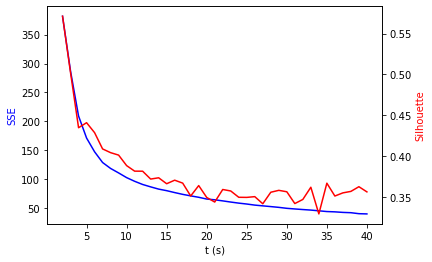

In [32]:
from matplotlib import pyplot as plt
import numpy as np

ax1 = plt.plot()
t=range(2, max_k + 1)
plt.plot(t,sse_list,'b-')
plt.xlabel('t (s)')
plt.ylabel('SSE',color='b')

ax2 =  plt.gca().twinx()
ax2.plot(t, silhouette_list, 'r-')
plt.ylabel('Silhouette', color='r')
plt.show()

Come possimao vedere l'sse comincia  astabilizzarsi intorno ai 10 cluster. Scegliamo questo numero di cluster per l'esecuzione finale.

In [37]:
kmeans = KMeans(n_clusters=13, n_init=10, max_iter=1000)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=13)

In [38]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))


SSE 86.12853578989433
Silhouette 0.3787952018520653
Separation 0.9986795533409777


Ora possiamo vedere a quale cluster è stato assegnato ogni sample e anche i centroidi

In [39]:
print(kmeans.cluster_centers_)
print(kmeans.labels_[:5])

[[2.52635759e-03 6.40241453e-02 8.35850047e-03 6.37997260e-01
  1.64893956e-01 3.93360438e-02 1.15361862e-02 2.02149961e-03]
 [1.13929421e-02 1.00941438e-02 6.23153328e-02 3.61249631e-01
  1.62615717e-01 1.32663909e-02 2.70071496e-01 7.10083238e-01]
 [1.90123563e-03 2.15072316e-02 1.23271296e-02 4.55483754e-01
  1.68618300e-01 1.09269596e-02 7.55353280e-01 4.04208342e-01]
 [6.37392272e-04 4.19805682e-03 7.49903875e-03 2.86782168e-01
  1.61646085e-01 6.91857380e-03 4.18518041e-03 6.66133815e-16]
 [4.35752971e-03 4.45064811e-02 1.21150719e-02 5.75175176e-01
  1.62246472e-01 1.45891704e-02 1.71696090e-01 3.89691990e-01]
 [2.72687282e-03 7.29204327e-03 2.64384348e-02 3.27275215e-01
  1.65255733e-01 1.17367243e-02 2.11346834e-01 3.95418879e-01]
 [1.25368751e-03 1.45694633e-02 7.40913766e-03 4.47338460e-01
  1.64238766e-01 1.50182521e-02 1.02058793e-02 1.57094438e-03]
 [3.56677653e-04 3.92180736e-04 1.22540074e-02 5.83597534e-02
  1.64014374e-01 5.05020363e-03 1.65396191e-03 4.44089210e-16]


Plottiamo quati sample ci sono in ogni cluster

[ 667  156  152  743  434  205 1240  487  353  318  195  414  211]


<BarContainer object of 13 artists>

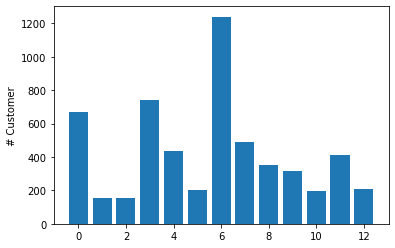

In [43]:
labels, counts = np.unique(kmeans.labels_, return_counts=True)
print(counts)
plt.ylabel('# Customer')

plt.bar(labels, counts,align='center')

Vediamo ora una visualizzazione 2d dei cluster assegnati. Questo è solo un esempio bisogna trovare qualcosa di significativo

In [44]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [45]:
centers

array([[4.97568216e+02, 1.13298351e+02, 4.11124438e+01, 6.60210165e+00,
        2.52462219e+00, 1.06448977e+03, 2.10535398e+00, 4.67858269e-03],
       [2.24033974e+03, 1.87051282e+01, 3.00051282e+02, 3.73827120e+00,
        2.48986538e+00, 3.59266038e+02, 4.92880480e+01, 1.64342507e+00],
       [3.74697368e+02, 3.87236842e+01, 6.01578947e+01, 4.71342156e+00,
        2.58144079e+00, 2.95980866e+02, 1.37851974e+02, 9.35504583e-01],
       [1.26282638e+02, 8.36339166e+00, 3.69878869e+01, 2.96766952e+00,
        2.47507268e+00, 1.87547937e+02, 7.63795424e-01, 1.54170800e-15],
       [8.57494253e+02, 7.90643678e+01, 5.91402299e+01, 5.95200828e+00,
        2.48423218e+00, 3.95049235e+02, 3.13345364e+01, 9.01907765e-01],
       [5.36980488e+02, 1.37902439e+01, 1.27878049e+02, 3.38669830e+00,
        2.53014146e+00, 3.17886232e+02, 3.85707972e+01, 9.15162144e-01],
       [2.47418548e+02, 2.65548387e+01, 3.65564516e+01, 4.62913270e+00,
        2.51462661e+00, 4.06656547e+02, 1.86257296e+00, 3.

In [57]:
kmeans.cluster_centers_

array([[2.52635759e-03, 6.40241453e-02, 8.35850047e-03, 6.37997260e-01,
        1.64893956e-01, 3.93360438e-02, 1.15361862e-02, 2.02149961e-03],
       [1.13929421e-02, 1.00941438e-02, 6.23153328e-02, 3.61249631e-01,
        1.62615717e-01, 1.32663909e-02, 2.70071496e-01, 7.10083238e-01],
       [1.90123563e-03, 2.15072316e-02, 1.23271296e-02, 4.55483754e-01,
        1.68618300e-01, 1.09269596e-02, 7.55353280e-01, 4.04208342e-01],
       [6.37392272e-04, 4.19805682e-03, 7.49903875e-03, 2.86782168e-01,
        1.61646085e-01, 6.91857380e-03, 4.18518041e-03, 6.66133815e-16],
       [4.35752971e-03, 4.45064811e-02, 1.21150719e-02, 5.75175176e-01,
        1.62246472e-01, 1.45891704e-02, 1.71696090e-01, 3.89691990e-01],
       [2.72687282e-03, 7.29204327e-03, 2.64384348e-02, 3.27275215e-01,
        1.65255733e-01, 1.17367243e-02, 2.11346834e-01, 3.95418879e-01],
       [1.25368751e-03, 1.45694633e-02, 7.40913766e-03, 4.47338460e-01,
        1.64238766e-01, 1.50182521e-02, 1.02058793e-02, 1.

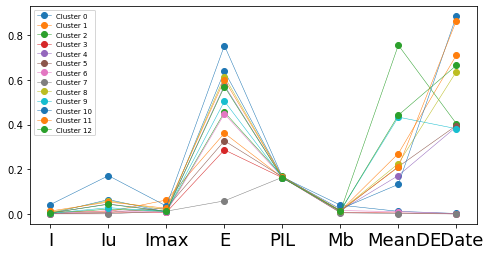

In [56]:
centers_normalized=kmeans.cluster_centers_
plt.figure(figsize=(8, 4))
for i in range(0, len(centers_normalized)):
    plt.plot(centers_normalized[i], marker='o', label='Cluster %s' % i, linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns[1:])), df.columns[1:], fontsize=18)
plt.legend(fontsize=7)

plt.show()

In [59]:
dataset_with_labels=df.copy()
dataset_with_labels["Labels"]=kmeans.labels_

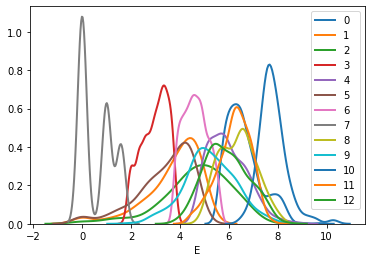

In [91]:

# Iterate through the five airlines
for i in range(0,13):
    # Subset to the airline
    subset = dataset_with_labels[dataset_with_labels['Labels'] == i]
    
    # Draw the density plot
    ax=sns.distplot(subset['E'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = i)


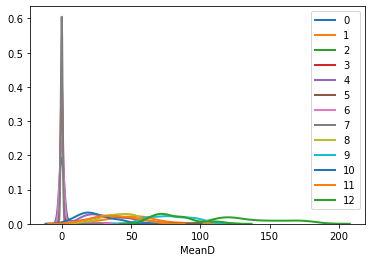

In [95]:
import seaborn as sns
for i in range(0,13):
    # Subset to the airline
    subset = dataset_with_labels[dataset_with_labels['Labels'] == i]
    
    # Draw the density plot
    ax=sns.distplot(subset['MeanD'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = i)

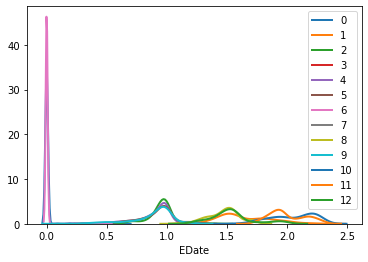

In [97]:
for i in range(0,13):
    # Subset to the airline
    subset = dataset_with_labels[dataset_with_labels['Labels'] == i]
    
    # Draw the density plot
    ax=sns.distplot(subset['EDate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = i)

In [119]:
dataset_with_labels[dataset_with_labels["Labels"]==12].describe()

,I,Iu,Imax,E,PIL,Mb,MeanD,EDate,Labels
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.0
mean,779.094787,76.928910,52.933649,5.897058,2.473299,371.964025,80.634992,1.538175,12.0
std,538.102903,52.114523,45.318506,0.880492,0.494153,254.399662,14.791778,0.175725,0.0
min,113.000000,16.000000,6.000000,3.913270,0.026000,96.012500,57.333333,1.198236,12.0
25%,404.500000,40.000000,25.000000,5.254726,2.567000,223.784167,69.666667,1.448103,12.0
50%,660.000000,59.000000,48.000000,5.797802,2.567000,303.180000,77.000000,1.521807,12.0
75%,981.500000,92.500000,68.000000,6.475495,2.567000,420.669167,89.000000,1.575975,12.0
max,3869.000000,348.000000,288.000000,8.281739,3.570000,1773.543333,121.666667,1.986617,12.0


## _old

Spider plot

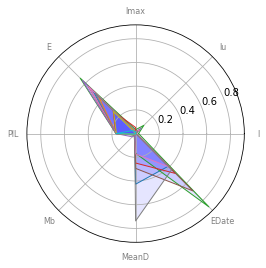

In [60]:
from math import pi
centers=kmeans.cluster_centers_#centers
# number of variable
N = len(df.columns[1:])
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], df.columns[1:], color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

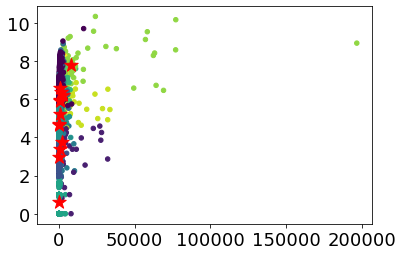

In [58]:


plt.scatter(df['I'], df['E'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

